In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
# sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion
import subprocess
from IPython.display import display, Image

Homo 720mer

In [2]:
pdb_id = '6mx4'
save_folder = '~/Documents/6mx4_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=False)

Successfully downloaded assembly file: /Users/sikao/Documents/6mx4_dir/6mx4-assembly1.cif.gz


In [4]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=30.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Homologous chains identified using CIF header:
{'A-13': 'A', 'G-14': 'A', 'D-51': 'A', 'G-20': 'A', 'A-19': 'A', 'G-18': 'A', 'J-25': 'A', 'D-7': 'A', 'J-11': 'A', 'A-12': 'A', 'A': 'A', 'A-27': 'A', 'A-17': 'A', 'A-36': 'A', 'J-18': 'A', 'D-50': 'A', 'G-50': 'A', 'J-8': 'A', 'A-56': 'A', 'J-58': 'A', 'A-26': 'A', 'J-59': 'A', 'J-16': 'A', 'A-24': 'A', 'G-42': 'A', 'G-16': 'A', 'D-25': 'A', 'G-9': 'A', 'A-20': 'A', 'J-17': 'A', 'J-39': 'A', 'D-60': 'A', 'G-28': 'A', 'D-44': 'A', 'A-22': 'A', 'G-32': 'A', 'G-46': 'A', 'G-49': 'A', 'J-2': 'A', 'A-52': 'A', 'J-12': 'A', 'D-27': 'A', 'D-45': 'A', 'D-9': 'A', 'A-5': 'A', 'J-40': 'A', 'G-8': 'A', 'J-23': 'A', 'A-21': 'A', 'G-25': 'A', 'G-51': 'A', 'G-2': 'A', 'D-30': 'A', 'A-40': 'A', 'G-44': 'A', 'D-52': 'A', 'G-48': 'A', 'D-15': 'A', 'D-28': 'A', 'D-20': 'A', 'D-43': 'A', 'J-6': 'A', 'A-48': 'A', 'J-42': 'A', 'D-36': 'A', 'J-46': 'A', 'J-4': 'A', 'A-41': 'A', 'A-29': 'A', 'J-41': 'A', 'J-31': 'A', 'D-4': 'A', 'J-43': 'A', 'G-38': 'A', 'G-4

PyMOL>load /Users/sikao/Documents/6mx4_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/6mx4_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 720 atoms.
PyMOL>color blue, name INT
 Executive: Colored 3120 atoms.
PyMOL>pseudoatom com_A, pos=[428.137, 326.309, 681.873], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[413.437, 317.251, 682.245], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A

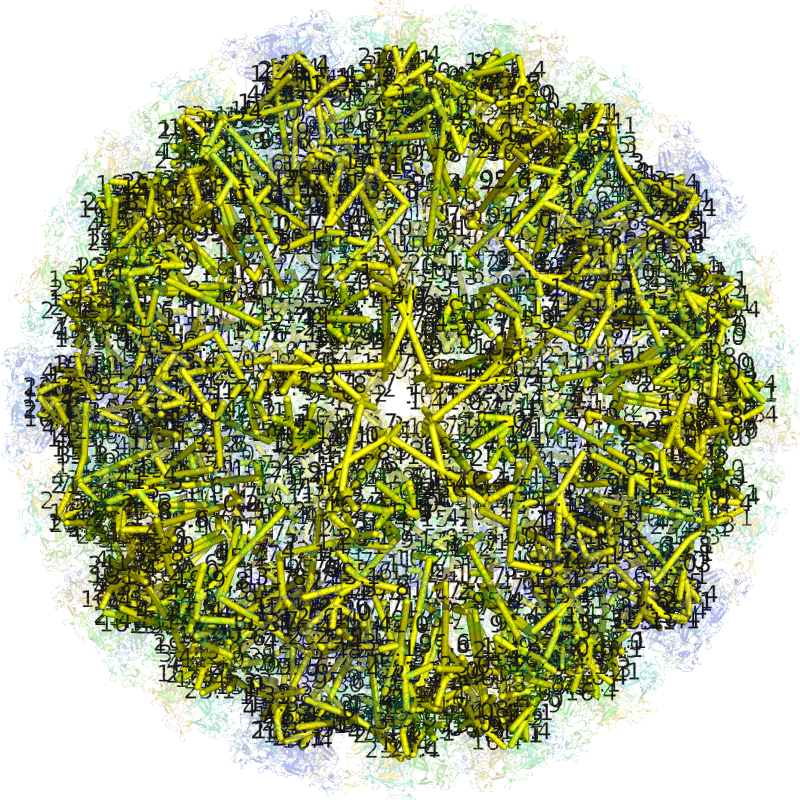

In [5]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))